# mechine Learning



# Linear Regression



```
# This is formatted as code
```

# import librairies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (17,7)

warnings.simplefilter(action = 'ignore', category=FutureWarning)

# Read csv


#```Read csv```



In [ ]:
df = pd.read_csv('USA_Housing.csv')
df.shape
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


#Data Analysis(EDA)

In [ ]:
df.count()

,0
Avg. Area Income,5000
Avg. Area House Age,5000
Avg. Area Number of Rooms,5000
Avg. Area Number of Bedrooms,5000
Area Population,5000
Price,5000
Address,5000


In [ ]:
df.drop('Address',axis= 1,inplace = True)

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


# variable separation


In [ ]:
x = df.drop('Price',axis = 1,inplace = False) #input,independent vars
y = df['Price'] # target variable,dependent var
#

❤ since  values are in the exponent form we need to convert them into normal values by using "Standard Scale" function

In [ ]:
y.values

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [ ]:
# from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
x_transform = preprocessing.StandardScaler().fit_transform(x)
# print(x_transform)
y_transform = preprocessing.StandardScaler().fit_transform(y.values.reshape(-1,1))
print(y_transform)



[[-0.49008146]
 [ 0.77550829]
 [-0.49021053]
 ...
 [-0.570244  ]
 [-0.0946402 ]
 [ 0.18941143]]


In [ ]:
y.values

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

# Spliting

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_transform,y_transform,test_size = 0.20,random_state= 101)

<Axes: ylabel='Density'>

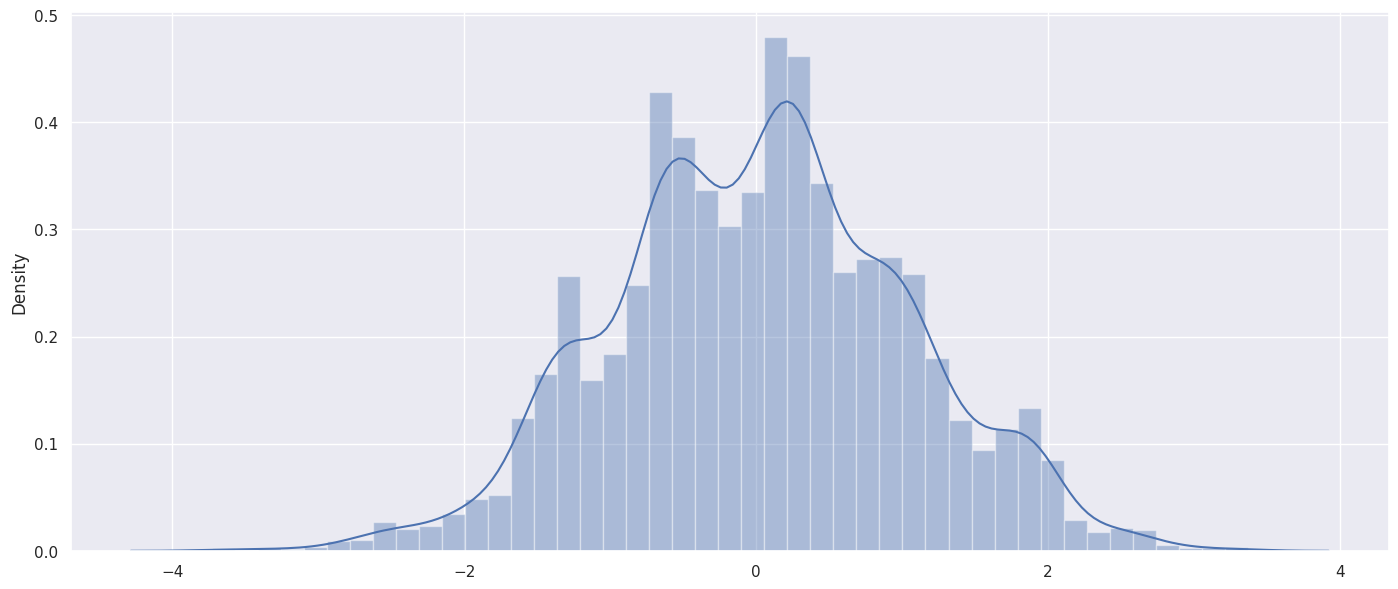

In [ ]:
sns.distplot(x_test)

In [ ]:
y_train

,Price
3413,1.305210e+06
1610,1.400961e+06
3459,1.048640e+06
4293,1.231157e+06
1039,1.391233e+06
...,...
4171,7.296417e+05
599,1.599479e+06
1361,1.102641e+06
1547,8.650995e+05


In [ ]:
x_train.shape

(4000, 5)

# Model taining(fit)


In [ ]:
# fit
# import model
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)

In [ ]:
x_test

# Prediction


In [ ]:
prediction = model.predict(x_test)

prediction = [int(x) for x in prediction]
# print(f'prediction:{prediction} ; actual:{y_test}')

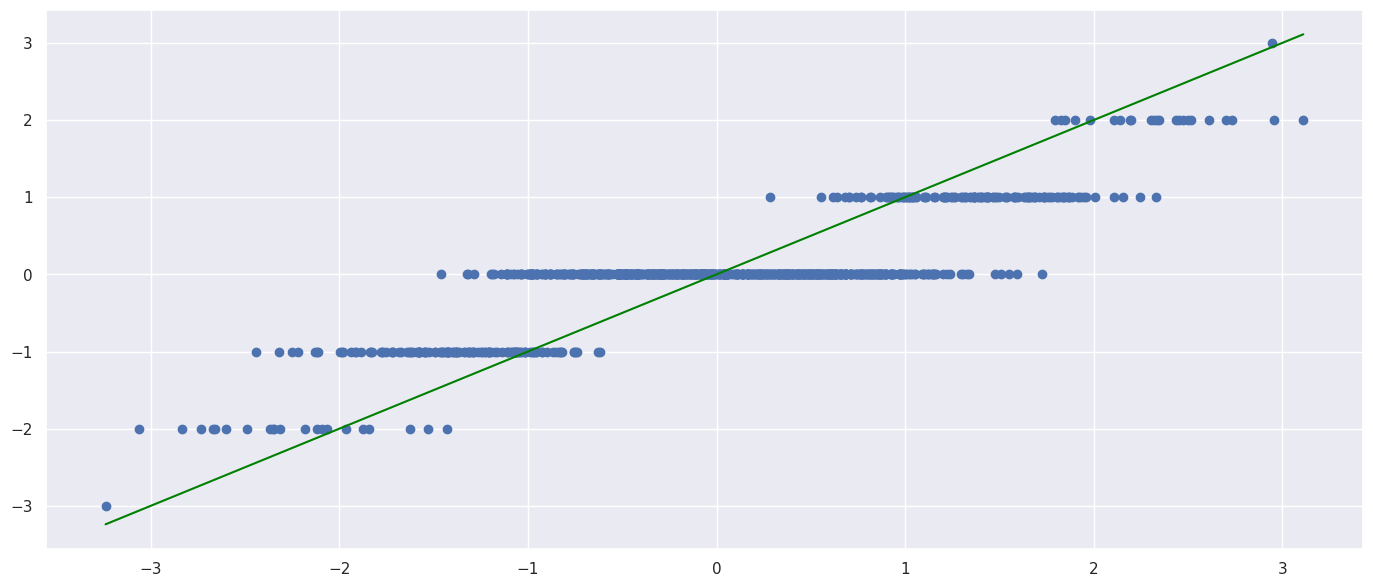

In [ ]:
plt.scatter(y_test,prediction)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='green',label='Perfect Prediction')

In [ ]:
results = np.column_stack((y_test,prediction))

print('Actual Values  |  Predicted Values')
print('----------------------------------')
for actual,predicted in results:
    print(f'{actual}  |  {predicted}')

Actual Values  |  Predicted Values
----------------------------------
0.055556341497041146  |  0.07320410566925897
-1.0168289977370732  |  -1.1610896953636902
1.3167043250363264  |  1.4404471300631583
-0.47611664491205485  |  -0.7352974515289884
-0.8023182356083525  |  -0.6759058214673574
-1.4218469476490507  |  -1.665182758419269
-0.18451082250562864  |  -0.44794331882145516
-1.4915177506298427  |  -1.0634592510584537
0.7587925406513124  |  0.6039543561321621
0.1589615126896743  |  -0.07853823996582998
0.5938108450761123  |  0.6336194131401665
0.1348368312267701  |  0.18829604419250287
1.480947893655831  |  1.4270091295781488
0.7918289597798792  |  0.2969650921590933
0.5944323463258434  |  0.4405906850217427
-0.31743316264668314  |  -0.027384199277051387
-1.428012988289451  |  -1.7511111272537705
-0.2639258515426896  |  -0.7594237945865282
-0.4469477259895263  |  -0.030801100023998478
0.4372938137402721  |  -0.09629788083237605
-2.3434452004858977  |  -2.0567746725895777
0.61673108948

# Residual (diff in actual and predict)


In [ ]:
residual = actual - prediction


residual

<Axes: ylabel='Density'>

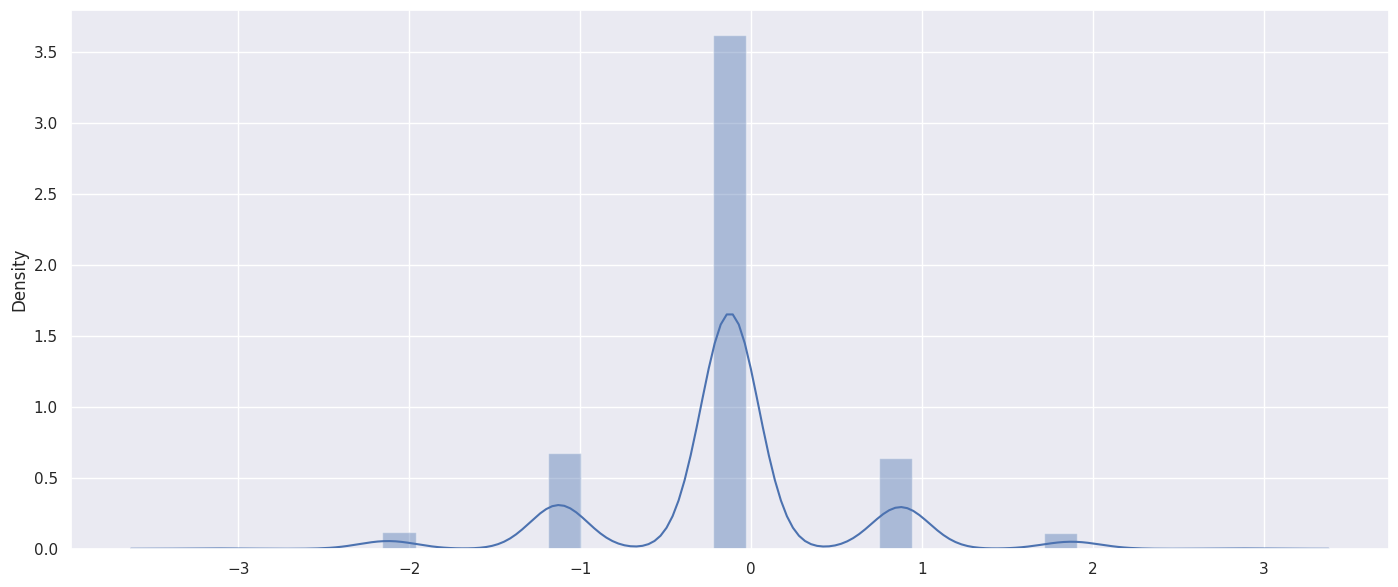

In [ ]:
sns.distplot(residual ,kde = True)

#graphs

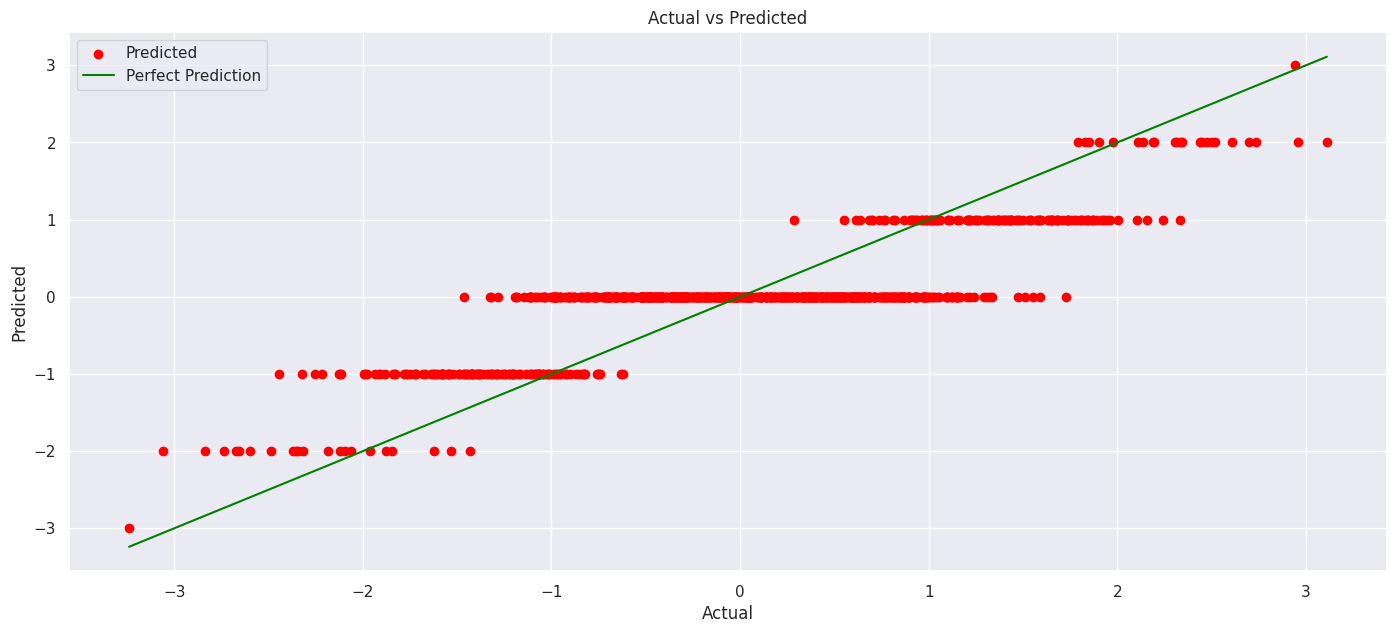

In [ ]:
# sns.scatterplot(x=y_test,y=prediction,color='red',label='Predicted')
# sns.lineplot(x=y_test,y=prediction,color='red',label='Prediction Line',linestyle='-')
plt.scatter(y_test,prediction,color='red',label='Predicted')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='green',label='Perfect Prediction')
plt.legend()
# plt.grid()
sns.set_theme(style = 'darkgrid')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

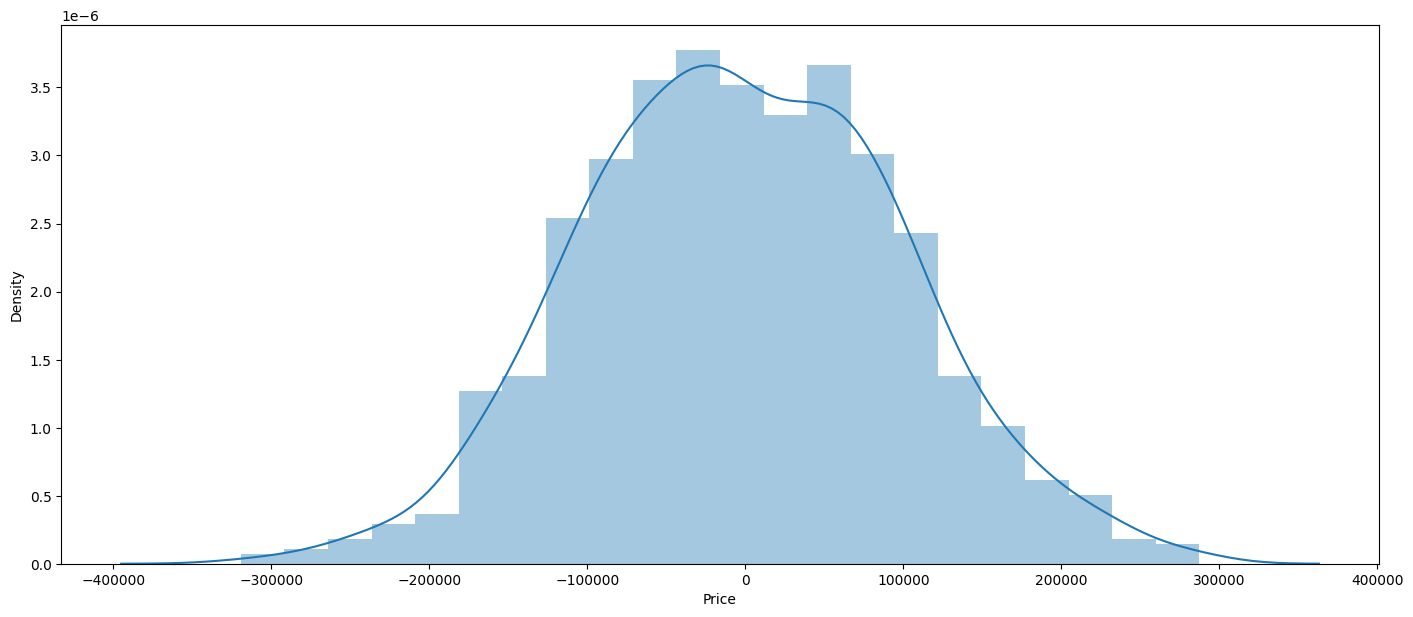

In [ ]:
sns.distplot(residual)

#prediction using single values


In [ ]:
prediction = model.predict(x_test)

prediction = [int(x) for x in prediction]

print(prediction)

[1257919, 822112, 1740669, 972452, 993422, 644126, 1073911, 856584, 1445318, 1204342, 1455792, 1298556, 1735924, 1336925, 1387637, 1222403, 613786, 963933, 1221197, 1198071, 505861, 1769106, 1853881, 1200369, 1065129, 1812033, 1768686, 1439920, 1387251, 1541178, 726418, 1754497, 1462185, 1025600, 1284926, 917454, 1187046, 999330, 1329536, 782191, 1393272, 578216, 822643, 1895533, 1672019, 966926, 1129674, 792797, 1161057, 1472396, 1457656, 1162939, 1099453, 1358107, 841103, 986322, 1123323, 1253538, 1428279, 499103, 1462817, 1108744, 660588, 1247031, 1342744, 1357505, 818858, 1487168, 1396247, 885078, 857545, 1212816, 1101069, 1834591, 924022, 855346, 822070, 1397829, 775933, 1638075, 1079223, 1355542, 1321447, 1198773, 757960, 649708, 1058567, 1384318, 1030349, 1297790, 550588, 1706268, 840478, 1627285, 1051446, 947163, 1187965, 1556566, 900538, 995246, 1221693, 1592557, 977671, 1428171, 1015834, 1448110, 877865, 831194, 1022735, 1844169, 1925418, 1405526, 1042730, 1056912, 1440167, 1

In [ ]:
val = [1,2,3,4]
for predict in val:
    prediction = model.predict([[predict]])
    print(int(prediction))
# model.predict(int[[5]])

TypeError: 'int' object is not iterable

# Root mean square Errors (loss function)

In [ ]:
# score the model
from sklearn.metrics import mean_squared_error

print("linear Regressioin Model")

print("==========================")

mse = mean_squared_error(y_test,prediction)

rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


linear Regressioin Model
Mean Squared Error: 0.3426806366147654
Root Mean Squared Error: 0.585389303468013


#Decision Tree Regressor (Algorithem)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor().fit(x_train,y_train)

dtr_prediction = dtr.predict(x_test)

dtr_mse = mean_squared_error(dtr_prediction,y_test)

print(f'Decision Tree Regressor(Algorithem) Result : {dtr_mse}')

Decision Tree Regressor(Algorithem) Result : 0.2547232974146391


# Random Forest Regressor (Algorithem)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor().fit(x_train,y_train)

rfr_prediction = rfr.predict(x_test)

rfr_mse = mean_squared_error(rfr_prediction,y_test)

print(f'Random Forest Regressor(Algorithem) Result : {rfr_mse}')

Random Forest Regressor(Algorithem) Result : 0.12054412493194126


# Gradiant Boosting Regressor (Algorithem)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor().fit(x_train,y_train)

gbr_prediction = gbr.predict(x_test)

gbr_mse = mean_squared_error(gbr_prediction,y_test)

print(f'Gradient Boosting Regressor(Algorithem) Result: {gbr_mse}')

Gradient Boosting Regressor(Algorithem) Result: 0.09952931680168402


# Comparison of Regressors

In [ ]:
model_score = {
    'Linear Regression' : mse,
    'Decision Tree Regressor' : dtr_mse,
    'Random Forest Regressor' : rfr_mse,
    'Gradient Boosting Regressor' : gbr_mse
}


# sort the models according to their scores in ascending order (lower values first)
sorted_model_score = sorted(model_score.items(),key = lambda x: x[1])

# display the model according to their ranking (lower values are better)
print(f'Model Rankings (lower values are better)')
print('-------------------------------------------')
for rank,(model_name,score) in enumerate(sorted_model_score,start = 1):
    print(f'{rank}. {model_name}: {score}')

Model Rankings (lower values are better)
-------------------------------------------
1. Gradient Boosting Regressor: 0.09952931680168402
2. Random Forest Regressor: 0.12054412493194126
3. Decision Tree Regressor: 0.2547232974146391
4. Linear Regression: 0.3426806366147654


#Practice Again all Regressors without transformed

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.drop('Address',axis=1 , inplace = True)

In [ ]:
import sklearn

In [ ]:
x = df.drop('Price',axis=1,inplace = False)
y = df['Price']

In [ ]:
print(x.shape)
print(y.shape)

(5000, 5)
(5000,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 101)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 5)
(4000,)
(1000, 5)
(1000,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)

[1257919.729097    822112.41884197 1740669.05865495  972452.12917494
  993422.26329315  644126.07414456 1073911.79101682  856584.00194133
 1445318.25518365 1204342.19071175 1455792.46212863 1298556.65696433
 1735924.33836095 1336925.7757779  1387637.43231922 1222403.77772069
  613786.28691982  963933.54416267 1221197.33050139 1198071.57563599
  505861.89531673 1769106.54723353 1853881.16842511 1200369.50507868
 1065129.1285072  1812033.73067313 1768686.47091262 1439920.83814323
 1387251.99649376 1541178.39224181  726418.80504278 1754497.60908688
 1462185.72653198 1025600.16081145 1284926.8685155   917454.59590853
 1187046.94956865  999330.91117488 1329536.63409595  782191.60441437
 1393272.03053841  578216.88394851  822643.37151048 1895533.11413226
 1672019.8489204   966926.45434583 1129674.55638146  792797.75914663
 1161057.18412143 1472396.71417164 1457656.70412313 1162939.334229
 1099453.68110992 1358107.44619413  841103.70380593  986322.30573616
 1123323.53002134 1253538.63235181 1

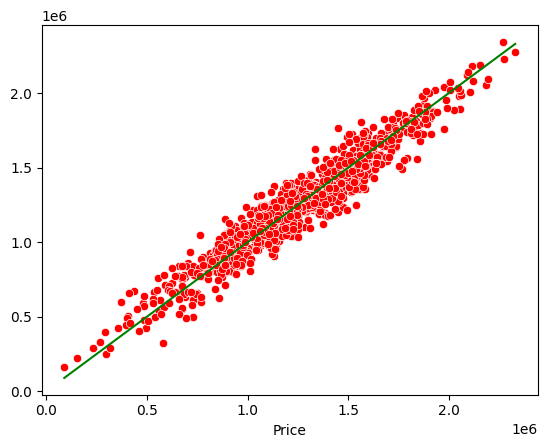

In [ ]:
sns.scatterplot(x = y_test,y = y_pred,color = 'red')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color = 'green')

In [ ]:
# display the values
results = np.column_stack((y_test,y_pred))
print('Actual Values  |  Predicted Values')
print('-----------------------------------')
for actual,predicted in results:
    print(f'{actual}  |  {predicted}')

Actual Values  |  Predicted Values
-----------------------------------
1251688.6157028745  |  1257919.729096997
873048.3196423554  |  822112.4188419683
1696977.6628325956  |  1740669.058654951
1063964.287873947  |  972452.1291749417
948788.2757094484  |  993422.2632931503
730043.6450595969  |  644126.0741445557
1166925.1461488248  |  1073911.7910168204
705444.1167909042  |  856584.0019413335
1499988.8795226102  |  1445318.2551836506
1288199.1527291734  |  1204342.190711745
1441736.7608375724  |  1455792.462128627
1279681.154396593  |  1298556.65696433
1754969.16194479  |  1735924.3383609485
1511653.454803501  |  1336925.775777895
1441956.2019363926  |  1387637.4323192155
1119992.6188354518  |  1222403.7777206884
727866.5251679078  |  613786.286919821
1138885.104005277  |  963933.5441626725
1074263.3172363583  |  1221197.3305013943
1386473.3653813817  |  1198071.5756359869
404643.60224269313  |  505861.89531672746
1449829.493750261  |  1769106.5472335266
1775874.7601040124  |  1853881.1

In [ ]:
residual = y_test - y_pred.reshape(-1)
print(residual)

1718     -6231.113394
2511     50935.900800
345     -43691.395822
2521     91512.158699
54      -44633.987584
            ...      
3900      8578.803183
3753   -104601.289733
3582     38997.150646
2392   -155113.478325
3343     90915.992050
Name: Price, Length: 1000, dtype: float64


<ipython-input-28-de15f7a7b687>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: xlabel='Price', ylabel='Density'>

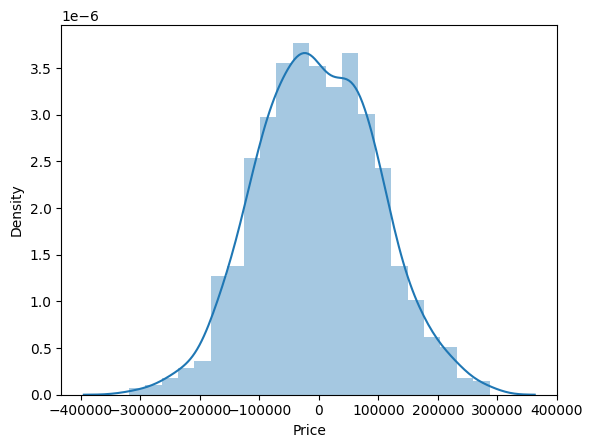

In [ ]:
sns.distplot(residual)

In [ ]:
residual.describe()

,Price
count,1000.000000
mean,-1531.654322
std,100538.300382
min,-319277.053483
25%,-72799.798091
50%,-4272.653099
75%,68807.531740
max,287283.246196


In [ ]:
from sklearn.metrics import mean_squared_error
print('Linear Regression Model')
print('=========================')
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Linear Regression Model
Mean Squared Error: 10100187858.864885
Root Mean Squared Error: 100499.69083964829


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor().fit(x_train,y_train)
dtr_prediction = dtr_model.predict(x_test)
dtr_mse = mean_squared_error(dtr_prediction,y_test)
print(f'Decision Tree Regressor Result: {dtr_mse}')

Decision Tree Regressor Result: 32534386343.42258


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor().fit(x_train,y_train)
rfr_prediction = rfr_model.predict(x_test)
rfr_mse = mean_squared_error(rfr_prediction,y_test)
print(f'Random Forest Regressor Result: {rfr_mse}')

Random Forest Regressor Result: 15085862077.766739


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor().fit(x_train,y_train)
gbr_prediction  = gbr_model.predict(x_test)
gbr_mse = mean_squared_error(gbr_prediction,y_test)
print(f'Gradient Boosting Regressor Resutl : {gbr_mse}')

Gradient Boosting Regressor Resutl : 12400765586.936567


In [ ]:
rmse = np.sqrt(mse)
dtr_rmse = np.sqrt(dtr_mse)
rfr_rmse = np.sqrt(rfr_mse)
gbr_rmse = np.sqrt(gbr_mse)

In [ ]:
# Rank the models
model_score = {
    'Linear Regression' : mse,
    'Decision Tree Regressor' : dtr_mse,
    'Random Forest Regressor' : rfr_mse,
    'Gradient Boosting Regressor' : gbr_mse
}
sorted_model_score = sorted(model_score.items(),key = lambda x: x[1])
# print(sorted_model_score)

for rank,(model_name,score) in enumerate(sorted_model_score,start = 1):
    print(f'{rank}. {model_name} : {score}')

print('----------------------------')
print(rmse)
print(dtr_rmse)
print(rfr_rmse)
print(gbr_rmse)

1. Linear Regression : 10100187858.864885
2. Gradient Boosting Regressor : 12400765586.936567
3. Random Forest Regressor : 15085862077.766739
4. Decision Tree Regressor : 32534386343.42258
----------------------------
100499.69083964829
180372.90911725792
122824.51741312374
111358.72479036641


#With Transformed Data

In [ ]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.drop('Address',axis = 1,inplace = True)

### **With all data transformed**



In [ ]:
from sklearn.preprocessing import StandardScaler
df_transformed = StandardScaler().fit_transform(df)
df_transformed = pd.DataFrame(df_transformed,columns = df.columns)
print(df_transformed.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          1.028660            -0.296927                   0.021274   
1          1.000808             0.025902                  -0.255506   
2         -0.684629            -0.112303                   1.516243   
3         -0.491499             1.221572                  -1.393077   
4         -0.807073            -0.944834                   0.846742   

   Avg. Area Number of Bedrooms  Area Population     Price  
0                      0.088062        -1.317599 -0.490081  
1                     -0.722301         0.403999  0.775508  
2                      0.930840         0.072410 -0.490211  
3                     -0.584540        -0.186734  0.080843  
4                      0.201513        -0.988387 -1.702518  


In [ ]:
x = df_transformed.drop('Price',axis = 1,inplace = False)
y = df_transformed['Price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 101)

lr_model = LinearRegression().fit(x_train,y_train)
lr_prediction = lr_model.predict(x_test)

lr_mse = mean_squared_error(lr_prediction,y_test)
print(f'Linear Regression Result: {lr_mse}')

Linear Regression Result: 0.08101725519794252


In [ ]:
print(lr_prediction)

[ 7.32041057e-02 -1.16108970e+00  1.44044713e+00 -7.35297452e-01
 -6.75905821e-01 -1.66518276e+00 -4.47943319e-01 -1.06345925e+00
  6.03954356e-01 -7.85382400e-02  6.33619413e-01  1.88296044e-01
  1.42700913e+00  2.96965092e-01  4.40590685e-01 -2.73841993e-02
 -1.75111113e+00 -7.59423795e-01 -3.08011000e-02 -9.62978808e-02
 -2.05677467e+00  1.52098781e+00  1.76108655e+00 -8.97896833e-02
 -4.72817582e-01  1.64256621e+00  1.51979807e+00  5.88667787e-01
  4.39499053e-01  8.75449510e-01 -1.43211322e+00  1.47961236e+00
  6.51726422e-01 -5.84771555e-01  1.49693747e-01 -8.91061508e-01
 -1.27521835e-01 -6.59171344e-01  2.76037559e-01 -1.27415346e+00
  4.56548998e-01 -1.85185082e+00 -1.15958593e+00  1.87905323e+00
  1.24601879e+00 -7.50947272e-01 -2.90011972e-01 -1.24411470e+00
 -2.01130069e-01  6.80645989e-01  6.38899321e-01 -1.95799442e-01
 -3.75603558e-01  3.56955835e-01 -1.10730256e+00 -6.96014327e-01
 -3.07999353e-01  6.07959601e-02  5.55697642e-01 -2.07591663e+00
  6.53514551e-01 -3.49290

### With single , single column transformed

In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
x = df.drop('Price',axis = 1,inplace = False)
y = df['Price']

from sklearn import preprocessing
pre_process  = preprocessing.StandardScaler().fit(x)
x_transformed  = pre_process.fit_transform(x)
# y_transformed  = preprocessing.StandardScaler().fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size = 0.10,random_state = 101)

lr_model = LinearRegression().fit(x_train,y_train)

lr_prediction = lr_model.predict(x_test)

print(lr_prediction)
lr_mse = mean_squared_error(lr_prediction,y_test)
lr_rmse = np.sqrt(lr_mse)
print(f'Linear Regression RMSE: {lr_mse}')
print(f'Linear Regression RMSE: {lr_rmse}')



[1257098.09685349  822086.76211938 1739484.60206384  973128.9269703
  993918.45735573  645734.60078803 1074412.81648685  856463.98369062
 1445048.63352694 1201847.71924782 1454475.51805013 1296582.98910134
 1736858.04511704 1336694.59015483 1386280.00636484 1223122.34992068
  615840.78603611  964515.62334817 1222020.63802963 1197532.31828304
  506756.96702134 1767894.37065039 1854829.42630351 1198521.37525139
 1065384.60130188 1810199.62960618 1767830.26189968 1440162.9747667
 1386122.51652193 1539972.94909227  729561.93190619 1754434.69364763
 1465273.07428251 1026021.79840116 1283514.57970667  917688.32850804
 1185681.03610736 1000137.89595728 1329344.79847155  784262.29954368
 1392528.47637802  576569.30274928  823465.14446257 1893895.24014477
 1671565.73974773  964720.06183539 1129280.90868273  792574.96874635
 1159381.43948676 1473209.24685792 1459527.31772498 1164492.85979007
 1098752.99065475 1360158.14296951  843194.09463543  985298.51640372
 1123531.58586396 1252412.0965265  1

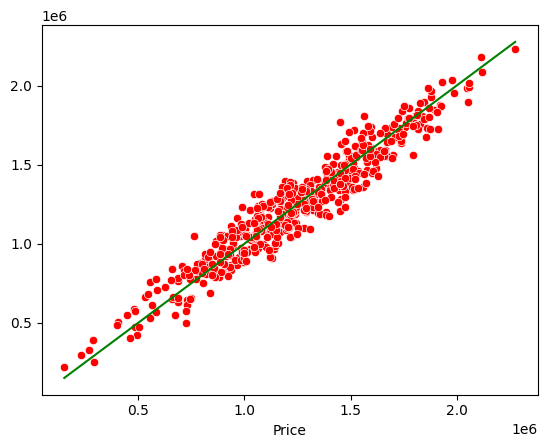

In [ ]:
sns.scatterplot(x = y_test,y = lr_prediction,color = 'red')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color = 'green')

In [ ]:
print(lr_prediction)

[[ 7.32041057e-02]
 [-1.16108970e+00]
 [ 1.44044713e+00]
 [-7.35297452e-01]
 [-6.75905821e-01]
 [-1.66518276e+00]
 [-4.47943319e-01]
 [-1.06345925e+00]
 [ 6.03954356e-01]
 [-7.85382400e-02]
 [ 6.33619413e-01]
 [ 1.88296044e-01]
 [ 1.42700913e+00]
 [ 2.96965092e-01]
 [ 4.40590685e-01]
 [-2.73841993e-02]
 [-1.75111113e+00]
 [-7.59423795e-01]
 [-3.08011000e-02]
 [-9.62978808e-02]
 [-2.05677467e+00]
 [ 1.52098781e+00]
 [ 1.76108655e+00]
 [-8.97896833e-02]
 [-4.72817582e-01]
 [ 1.64256621e+00]
 [ 1.51979807e+00]
 [ 5.88667787e-01]
 [ 4.39499053e-01]
 [ 8.75449510e-01]
 [-1.43211322e+00]
 [ 1.47961236e+00]
 [ 6.51726422e-01]
 [-5.84771555e-01]
 [ 1.49693747e-01]
 [-8.91061508e-01]
 [-1.27521835e-01]
 [-6.59171344e-01]
 [ 2.76037559e-01]
 [-1.27415346e+00]
 [ 4.56548998e-01]
 [-1.85185082e+00]
 [-1.15958593e+00]
 [ 1.87905323e+00]
 [ 1.24601879e+00]
 [-7.50947272e-01]
 [-2.90011972e-01]
 [-1.24411470e+00]
 [-2.01130069e-01]
 [ 6.80645989e-01]
 [ 6.38899321e-01]
 [-1.95799442e-01]
 [-3.7560355

In [ ]:
residual1 = y_test - lr_prediction
print(residual)

[[-1.76477642e-02]
 [ 1.44260698e-01]
 [-1.23742805e-01]
 [ 2.59180807e-01]
 [-1.26412414e-01]
 [ 2.43335811e-01]
 [ 2.63432496e-01]
 [-4.28058500e-01]
 [ 1.54838185e-01]
 [ 2.37499753e-01]
 [-3.98085681e-02]
 [-5.34592130e-02]
 [ 5.39387641e-02]
 [ 4.94863868e-01]
 [ 1.53841661e-01]
 [-2.90048963e-01]
 [ 3.23098139e-01]
 [ 4.95497943e-01]
 [-4.16146626e-01]
 [ 5.33591695e-01]
 [-2.86670528e-01]
 [-9.04256718e-01]
 [-2.20929810e-01]
 [ 4.76115376e-03]
 [ 1.15010952e-01]
 [ 6.66443990e-02]
 [ 7.57395726e-02]
 [-4.42884403e-02]
 [-6.03454575e-02]
 [-1.39250522e-01]
 [-2.88844372e-01]
 [ 2.06690010e-01]
 [ 3.21438674e-01]
 [ 7.34075427e-02]
 [ 4.80780436e-01]
 [ 1.57875876e-01]
 [-5.74841502e-02]
 [-3.29410482e-01]
 [ 7.46035937e-04]
 [-1.10396878e-01]
 [ 5.34506465e-02]
 [ 4.12179189e-01]
 [-2.66910485e-01]
 [-1.42198449e-01]
 [ 1.02264338e-01]
 [-1.27087426e-01]
 [ 3.23452264e-01]
 [ 2.52800574e-01]
 [-3.13856787e-01]
 [ 1.38054582e-01]
 [ 2.16535560e-01]
 [ 1.66772359e-01]
 [ 5.1078817

In [ ]:
# display the values
results = np.column_stack((y_test,lr_prediction))
print('Actual Values  |  Predicted Values')
print('-----------------------------------')
for actual,predicted in results:
    print(f'{actual}  |  {predicted}')

Actual Values  |  Predicted Values
-----------------------------------
1251688.6157028745  |  1257098.0968534893
873048.3196423554  |  822086.7621193784
1696977.6628325956  |  1739484.6020638444
1063964.287873947  |  973128.9269702961
948788.2757094484  |  993918.45735573
730043.6450595969  |  645734.6007880255
1166925.1461488248  |  1074412.8164868471
705444.1167909042  |  856463.9836906168
1499988.8795226102  |  1445048.6335269404
1288199.1527291734  |  1201847.7192478236
1441736.7608375724  |  1454475.5180501346
1279681.154396593  |  1296582.9891013403
1754969.16194479  |  1736858.0451170353
1511653.454803501  |  1336694.5901548325
1441956.2019363926  |  1386280.0063648417
1119992.6188354518  |  1223122.349920683
727866.5251679078  |  615840.7860361055
1138885.104005277  |  964515.6233481696
1074263.3172363583  |  1222020.6380296329
1386473.3653813817  |  1197532.3182830352
404643.60224269313  |  506756.9670213378
1449829.493750261  |  1767894.3706503892
1775874.7601040124  |  18548

In [ ]:
prediction = model.predict(x_test)

prediction = [int(x) for x in prediction]

print(prediction)

[-2586561, -2759621, -2348010, -2645339, -2795498, -2956522, -2567678, -2783444, -2433459, -2848270, -2762831, -2547682, -2553367, -2378948, -2588785, -2652957, -2808553, -2725974, -2568640, -2677682, -2721085, -2473691, -2154677, -2718957, -2769358, -2509358, -2630543, -2375966, -2475400, -2290705, -3117041, -2110287, -2593874, -2592548, -2365401, -2877525, -3195835, -2908149, -2926371, -2930248, -2864808, -2786886, -2468677, -2398294, -2326573, -2885789, -2508873, -2457771, -2712535, -2271347, -2567638, -2882929, -2592474, -2504666, -2681628, -2828101, -2519708, -2664862, -2813238, -3047094, -2339462, -2682708, -2855573, -2788316, -2218588, -2609813, -2736275, -2417999, -2683672, -2837899, -2862882, -2227909, -2936929, -2476271, -2926024, -2713036, -2636084, -2744181, -2805956, -2383554, -2439543, -2802811, -2598998, -2424087, -2698167, -2784512, -2381983, -2358540, -2570462, -2815774, -2812377, -2251860, -2525410, -2447810, -2757640, -2883677, -2425049, -2373284, -2847142, -2849813,

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# After predicting with the model
lr_prediction_original_scale = preprocessing.StandardScaler().fit(y.values.reshape(-1, 1)).inverse_transform(lr_prediction)
print(lr_prediction_original_scale)

[[1257919.72909701]
 [ 822112.41884176]
 [1740669.05865509]
 [ 972452.12917479]
 [ 993422.26329292]
 [ 644126.07414431]
 [1073911.7910164 ]
 [ 856584.00194141]
 [1445318.25518372]
 [1204342.19071214]
 [1455792.46212894]
 [1298556.65696451]
 [1735924.33836104]
 [1336925.77577778]
 [1387637.43231928]
 [1222403.77772052]
 [ 613786.28691938]
 [ 963933.54416253]
 [1221197.33050132]
 [1198071.57563599]
 [ 505861.89531635]
 [1769106.54723384]
 [1853881.16842504]
 [1200369.50507893]
 [1065129.12850721]
 [1812033.73067346]
 [1768686.47091279]
 [1439920.83814321]
 [1387251.9964939 ]
 [1541178.39224186]
 [ 726418.80504233]
 [1754497.60908684]
 [1462185.72653163]
 [1025600.16081117]
 [1284926.86851559]
 [ 917454.59590873]
 [1187046.94956896]
 [ 999330.91117487]
 [1329536.63409608]
 [ 782191.6044142 ]
 [1393272.03053858]
 [ 578216.88394869]
 [ 822643.37151015]
 [1895533.11413239]
 [1672019.84892042]
 [ 966926.45434591]
 [1129674.55638148]
 [ 792797.75914644]
 [1161057.18412151]
 [1472396.71417146]


In [ ]:
from sklearn.metrics import mean_squared_error
lr_mse_original = mean_squared_error(preprocessing.StandardScaler().fit(y.values.reshape(-1, 1)).inverse_transform(y_test),
                                     lr_prediction_original_scale)
lr_rmse_original = np.sqrt(lr_mse_original)

print(f'Linear Regression RMSE (Original Scale): {lr_rmse_original}')


Linear Regression RMSE (Original Scale): 100499.69083966178


<ipython-input-56-c02696bef2b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,kde  = True)


<Axes: ylabel='Density'>

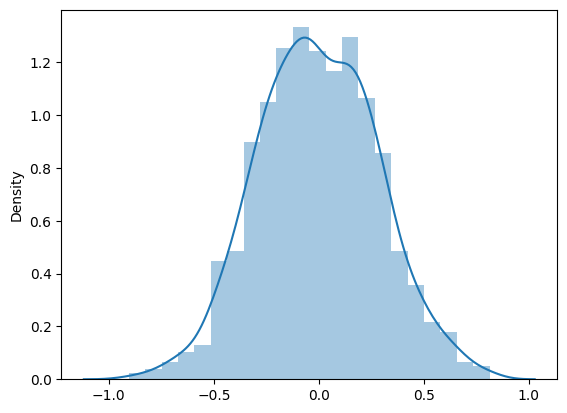

In [ ]:
sns.distplot(residual1,kde  = True)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
result = df.groupby('day')['tip'].agg('sum')
result

<ipython-input-5-032bf3ef87db>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('day')['tip'].agg('sum')


,tip
day,
Thur,171.83
Fri,51.96
Sat,260.40
Sun,247.39


In [ ]:
result = df.groupby('sex')['fare'].agg('sum')
result